In [3]:
from dateutil.parser import parse
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import xarray as xr
import numpy as np
import pandas as pd

import os
import glob
import pathlib
from pathlib import Path

#plt.rcParams.update({'figure.figsize': (15, 7), 'figure.dpi': 120})

Negative rainfall

In [4]:
df = pd.read_csv("D:/Allaus/Data_analysis/Altres_estacions_from_meteo/2_no_nulls_2022/Borda_Vidal.csv")
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
#df

In [5]:
df.rain.min()

-6.0

In [6]:
df.date[0]

Timestamp('2008-07-01 00:00:00')

C:\Users\ginam\AppData\Local\Temp\ipykernel_14700\1453625762.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45)


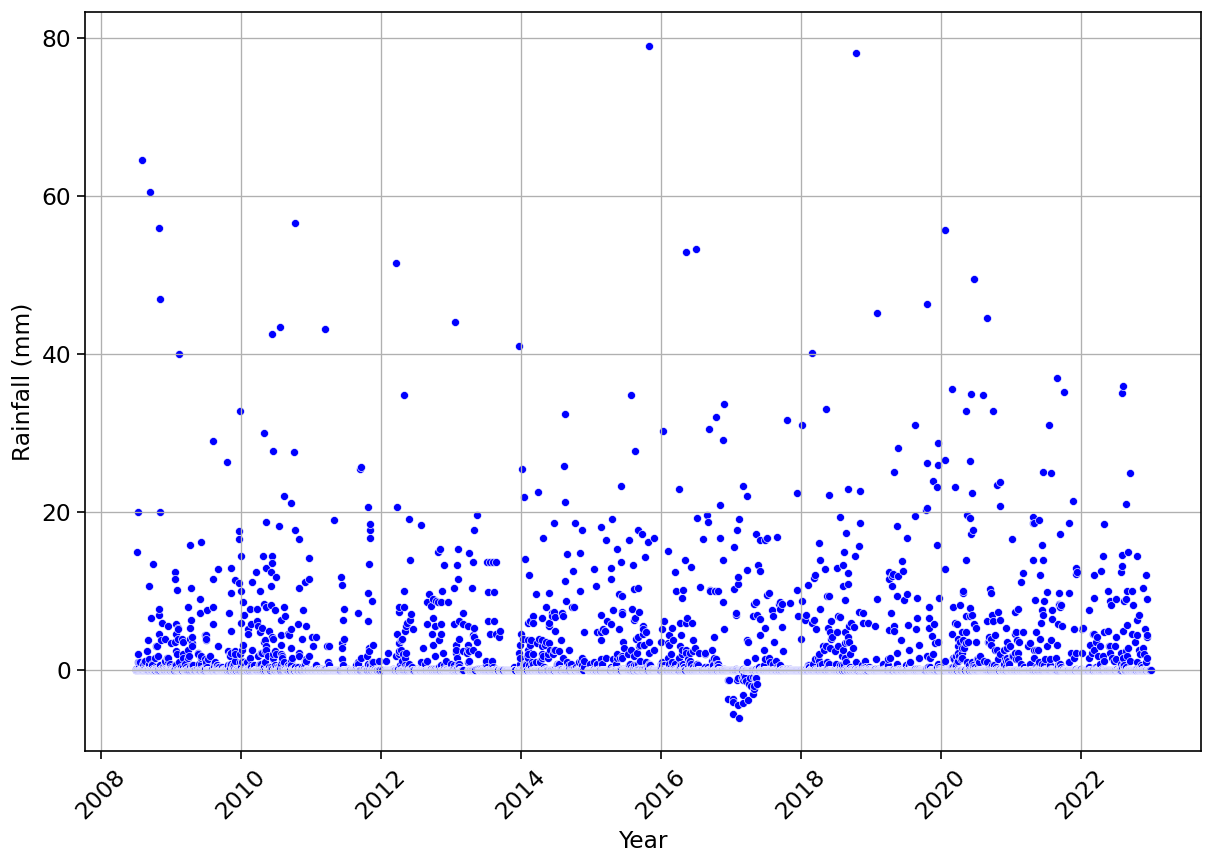

In [13]:
plt.figure(figsize=(12, 8))
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14, 
                             "xtick.labelsize":14, "ytick.labelsize":14, 'legend.fontsize': 14})   
fig = sns.scatterplot(x=df.date, y=df.rain, color='b')
fig.set(xlabel = 'Year', ylabel = 'Rainfall (mm)')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
#fig.tick_params(labelrotation=15)
fig.grid()
#plt.suptitle("Borda Vidal station", y=0.94)
#fig.set_xlim(df.date[0], df.date[5296])
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/negative rain - Borda Vidal.png', dpi=300)
plt.show();

Outlier detection - **Z-score method**

In [ ]:
### For temp_min

In [14]:
df = pd.read_csv("D:/Allaus/Data_analysis/Neu_from_meteo/7_map/Soldeu.csv")
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
df

,date,wind_dir,wind_vel,snowdrift,temp_max,temp_min,rain,snow_tot,snow_new,wind_dir_qual,snowdrift_intensity,snowdrift_from,wind_dir_deg
0,1981-12-01 08:00:00,NaN,NaN,NaN,3.0,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-12-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-12-02 08:00:00,NaN,NaN,NaN,5.8,-5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981-12-02 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981-12-03 08:00:00,NaN,NaN,NaN,4.9,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12397,2022-04-28 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12398,2022-04-29 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12399,2022-04-29 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12400,2022-04-30 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


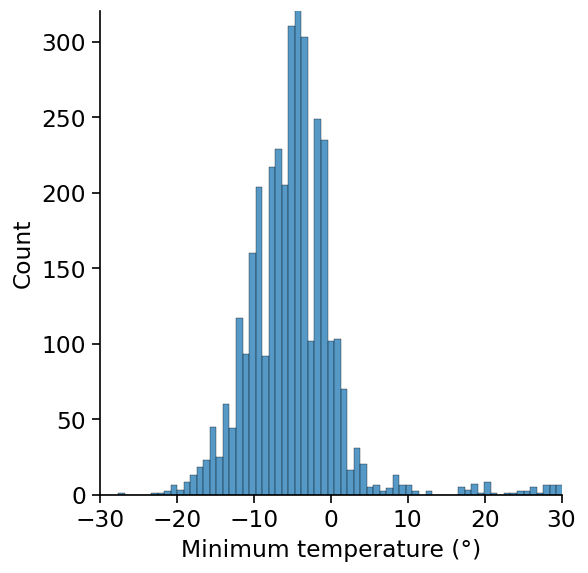

In [16]:
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14, 
                             "xtick.labelsize":14, "ytick.labelsize":14, 'legend.fontsize': 14})
fig = sns.displot(df.temp_min)
fig.set(xlabel = 'Minimum temperature (°)')
fig.set(xlim=(-30, 30))
fig.set(ylim=(0, 320))
#fig.set(title="Soldeu station")
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/outliers - temp min - Soldeu.png', dpi=300)
plt.show();

In [ ]:
### For temp_max

In [17]:
df = pd.read_csv("D:/Allaus/Data_analysis/Neu_from_meteo/7_map/Pal.csv")
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
df

,date,wind_dir,wind_vel,snowdrift,temp_max,temp_min,rain,snow_tot,snow_new,wind_dir_qual,snowdrift_intensity,snowdrift_from,wind_dir_deg
0,1981-12-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-12-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-12-02 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981-12-02 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981-12-03 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12397,2022-04-28 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12398,2022-04-29 08:00:00,99.0,1.0,0.0,14.7,5.1,2.0,0.0,0.0,variable wind,no transport,NaN,NaN
12399,2022-04-29 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12400,2022-04-30 08:00:00,99.0,1.0,0.0,16.3,5.3,0.0,0.0,0.0,variable wind,no transport,NaN,NaN


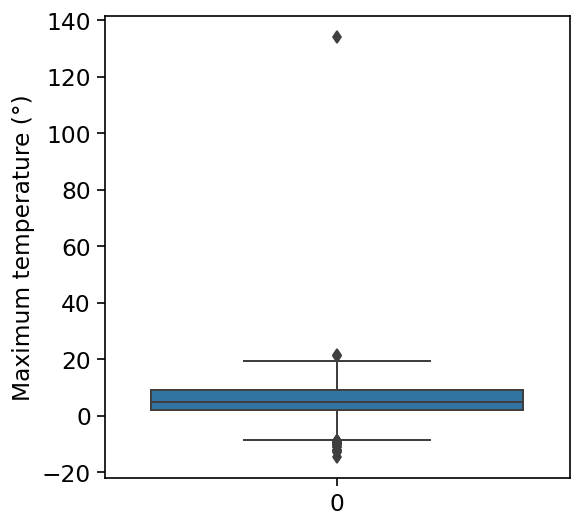

In [22]:
plt.figure(figsize=(5,5))
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14, 
                             "xtick.labelsize":14, "ytick.labelsize":14, 'legend.fontsize': 14})
fig = sns.boxplot(df.temp_max)
fig.set(ylabel = 'Maximum temperature (°)')
#fig.set(xlim=(-3, 3))
# fig.set(ylim=(0, 320))
#fig.set(title="Pal station")
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/outliers - temp max - Pal.png', dpi=300, bbox_inches='tight')
plt.show();

Plot the threshold for extreme rain

In [24]:
df = pd.read_csv("D:/Allaus/Data_analysis/Altres_estacions_from_meteo/7_temps_outliers/La_Comella.csv")
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df

,id,date,temp_max,temp_min,dir_max,vel_max,dir_med,vel_med,rain,dir_max_qual,dir_med_qual
0,99130008,2007-01-01,9.4,3.5,140.0,11.2,170.0,4.9,0.0,SE,S
1,99130008,2007-01-02,8.2,3.6,170.0,11.8,160.0,6.9,0.0,S,S
2,99130008,2007-01-03,6.8,0.3,200.0,8.5,150.0,3.6,0.0,S,SE
3,99130008,2007-01-04,10.9,3.7,320.0,5.8,140.0,3.3,0.0,NW,SE
4,99130008,2007-01-05,9.8,2.1,50.0,5.0,130.0,2.6,0.0,NE,SE
...,...,...,...,...,...,...,...,...,...,...,...
5839,99130008,2022-12-27,10.6,2.7,290.0,7.0,NaN,NaN,0.0,W,NaN
5840,99130008,2022-12-28,9.2,2.4,220.0,8.0,NaN,NaN,0.0,SW,NaN
5841,99130008,2022-12-29,8.2,2.6,40.0,5.0,NaN,NaN,0.0,NE,NaN
5842,99130008,2022-12-30,9.3,4.4,50.0,5.0,NaN,NaN,0.0,NE,NaN


In [25]:
df.date[5843]

Timestamp('2022-12-31 00:00:00')

C:\Users\ginam\AppData\Local\Temp\ipykernel_14700\2334638881.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45)


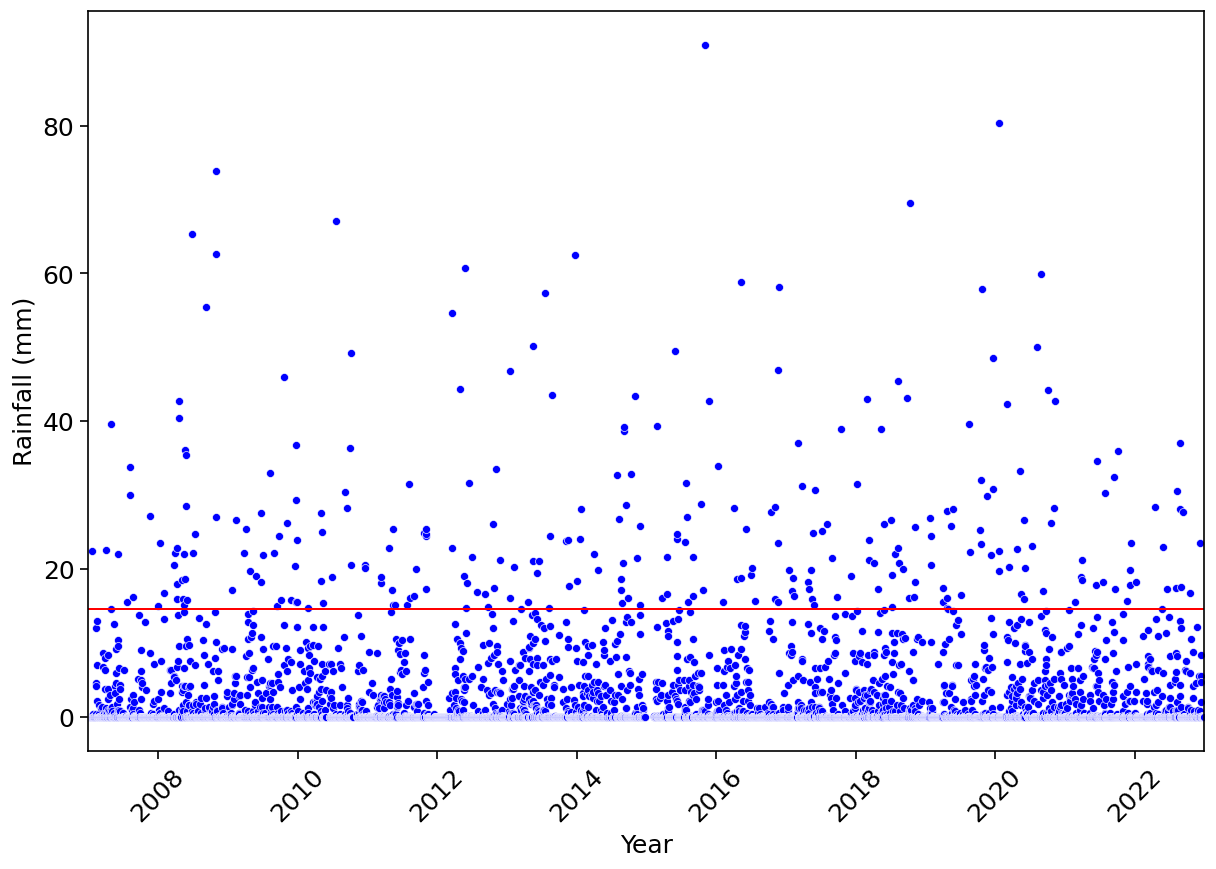

In [30]:
plt.figure(figsize=(12, 8))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, 
                             "xtick.labelsize":15, "ytick.labelsize":15, 'legend.fontsize': 15})
fig = sns.scatterplot(x=df.date, y=df.rain, color='b')
fig.set(xlabel = 'Year', ylabel = 'Rainfall (mm)')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
#fig.tick_params(labelrotation=15)
#fig.grid()
plt.axhline(y=df.rain.quantile(q=0.95),color='r') 
#plt.suptitle("La Comella station", y=0.94)
fig.set_xlim(df.date[0], df.date[5843])
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/extreme rain threshold - La Comella.png', dpi=300)
plt.show();

Correlation

In [31]:
df = pd.read_csv("D:/Allaus/Data_analysis/Neu_from_meteo/15_temp_range_temp_trend/Pal.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df

,date,wind_dir,wind_vel,snowdrift,temp_max,temp_min,rain,snow_tot,snow_new,wind_dir_qual,...,snow_accum_48h,temp_med,extreme_rain,rain3d,rain2d,temp_range,temp_trend2d,temp_trend2dabs,temp_trend3d,temp_trend3dabs
0,1981-12-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-12-02 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-12-03 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981-12-04 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981-12-05 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,2022-04-26 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.70,NaN
6197,2022-04-27 08:00:00,0.0,0.0,0.0,13.7,3.2,0.0,0.0,0.0,calm wind,...,NaN,8.45,NaN,NaN,NaN,10.5,NaN,NaN,NaN,NaN
6198,2022-04-28 08:00:00,22.0,1.0,0.0,14.1,5.0,0.1,0.0,0.0,SW,...,0.0,9.55,NaN,NaN,0.1,9.1,1.10,1.10,1.45,1.45
6199,2022-04-29 08:00:00,99.0,1.0,0.0,14.7,5.1,2.0,0.0,0.0,variable wind,...,0.0,9.90,NaN,2.1,2.1,9.6,0.35,0.35,1.25,1.25


In [32]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')    

C:\Users\ginam\AppData\Local\Temp\ipykernel_14700\784712418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,wind_dir,wind_vel,snowdrift,temp_max,temp_min,rain,snow_tot,snow_new,wind_dir_deg,snow_accum_72h,snow_accum_48h,temp_med,extreme_rain,rain3d,rain2d,temp_range,temp_trend2d,temp_trend2dabs,temp_trend3d,temp_trend3dabs
wind_dir,1.000000,0.463910,0.244706,-0.071564,-0.100196,0.092218,-0.015018,0.097393,0.430488,0.085873,0.091567,-0.089485,0.019044,0.070882,0.083284,0.022761,-0.085341,0.078608,-0.137191,0.126081
wind_vel,0.463910,1.000000,0.500314,-0.160794,-0.178661,0.104567,0.018888,0.154219,-0.043269,0.110893,0.149217,-0.176345,-0.045003,0.065161,0.095190,-0.017922,-0.131004,0.132496,-0.171503,0.173350
snowdrift,0.244706,0.500314,1.000000,-0.242510,-0.237269,0.170788,0.144785,0.288352,0.025435,0.270933,0.341264,-0.250220,-0.112280,0.162523,0.190842,-0.081407,-0.115174,0.095607,-0.058243,0.107831
temp_max,-0.071564,-0.160794,-0.242510,1.000000,0.846063,-0.166465,-0.269708,-0.306122,0.066351,-0.408621,-0.396847,0.967272,0.054328,-0.233145,-0.228061,0.537731,0.292946,-0.075930,-0.028097,-0.049120
temp_min,-0.100196,-0.178661,-0.237269,0.846063,1.000000,-0.126736,-0.264062,-0.285995,0.059115,-0.377062,-0.361159,0.953639,0.128786,-0.188504,-0.173190,0.005502,0.318543,-0.148862,0.049942,-0.165273
rain,0.092218,0.104567,0.170788,-0.166465,-0.126736,1.000000,0.134391,0.687016,0.044204,0.471243,0.596676,-0.155076,1.000000,0.642446,0.804709,-0.115547,-0.134475,0.056120,-0.126957,0.051158
snow_tot,-0.015018,0.018888,0.144785,-0.269708,-0.264062,0.134391,1.000000,0.256548,-0.028106,0.361293,0.318430,-0.279494,0.074048,0.191882,0.170738,-0.094171,0.028701,0.024234,0.076190,0.017208
snow_new,0.097393,0.154219,0.288352,-0.306122,-0.285995,0.687016,0.256548,1.000000,0.016369,0.640698,0.797663,-0.309709,0.222284,0.429585,0.554566,-0.125362,-0.203973,0.109902,-0.153715,0.084193
wind_dir_deg,0.430488,-0.043269,0.025435,0.066351,0.059115,0.044204,-0.028106,0.016369,1.000000,0.037055,0.017815,0.064818,-0.015146,0.063582,0.046557,0.025450,0.012782,0.027564,-0.043308,0.037307
snow_accum_72h,0.085873,0.110893,0.270933,-0.408621,-0.377062,0.471243,0.361293,0.640698,0.037055,1.000000,0.875028,-0.409381,0.250399,0.720091,0.640034,-0.171739,-0.031373,0.093363,0.082198,0.117421


In [33]:
df.snow_tot.corr(df.temp_range)

-0.09417087639517535

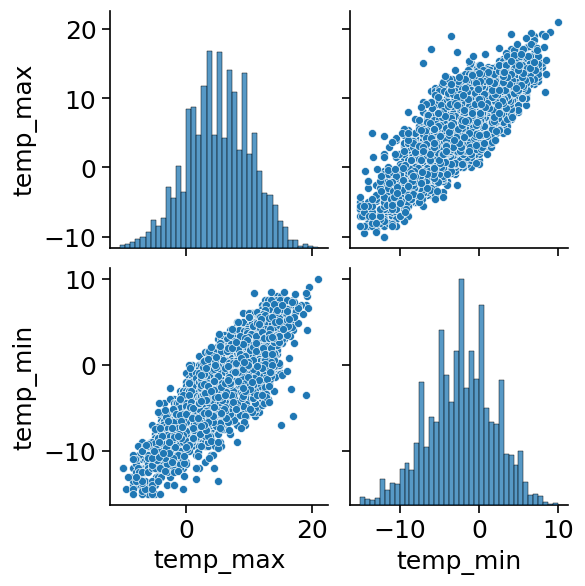

In [34]:
temps = df[['temp_max', 'temp_min']]
temps

sns.pairplot(temps) # or sns.pairplot(num)

In [35]:
print(sns.color_palette("colorblind").as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


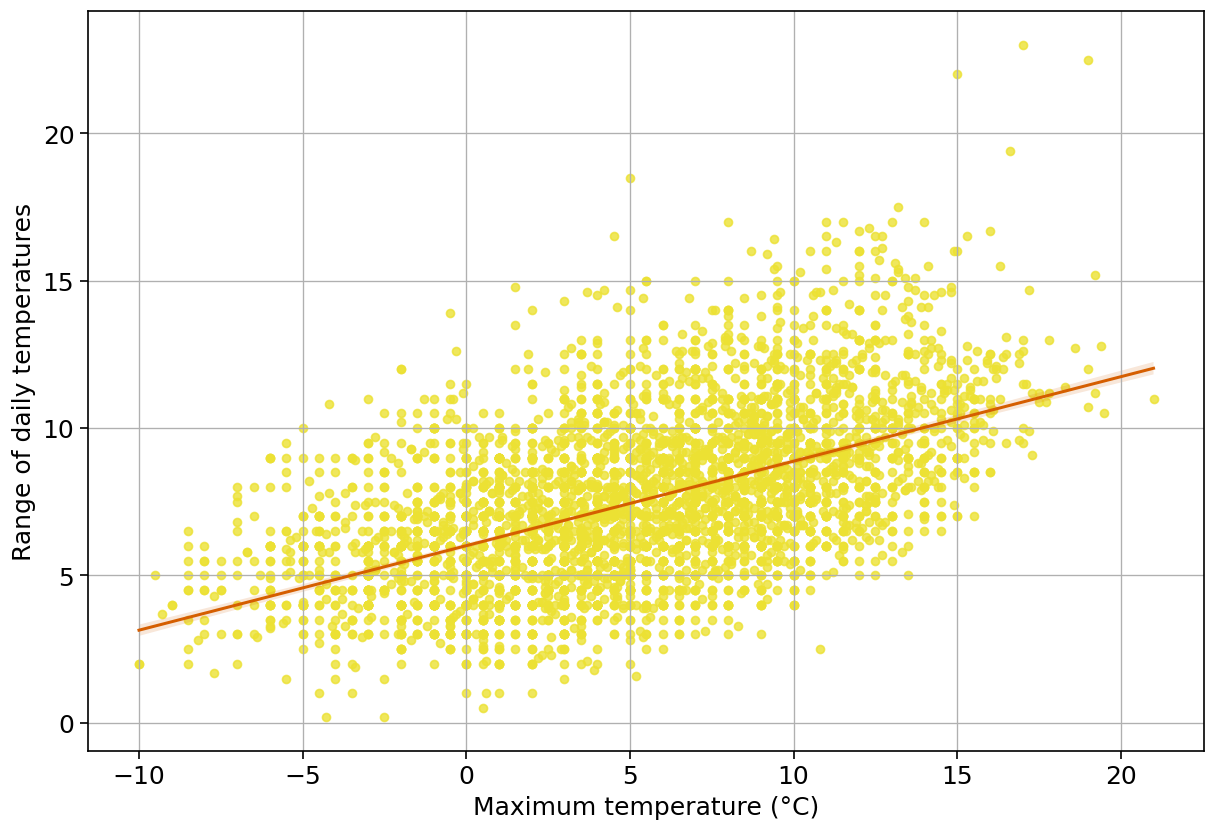

In [38]:
#sns.color_palette(palette='colorblind')
plt.figure(figsize=(12,8))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, 
                             "xtick.labelsize":15, "ytick.labelsize":15, 'legend.fontsize': 15})
fig = sns.regplot(x=df.temp_max, y=df.temp_range, scatter_kws = {"color": "#ece133"}, line_kws = {"color": "#d55e00"})  
fig.set(xlabel = 'Maximum temperature (°C)', ylabel='Range of daily temperatures')
fig.grid()
#fig.set(xlim=(-20,30))
#plt.suptitle("Pal station", y=0.92)

plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/temp correlation - Pal.png', dpi=300)
plt.show()
